In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BMW sales data (2010-2024).csv')
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
columns = df.select_dtypes(include=['object']).columns.tolist()
for col in columns:
    a = df[col].value_counts()
    print('----'*30)
    print(a)

------------------------------------------------------------------------------------------------------------------------
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Fuel_Type


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21196\772703714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a, x='Fuel_Type', y='Price_USD', palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21196\772703714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a, x='Fuel_Type', y='Price_USD', palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21196\772703714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a, x='Fuel_Type', y='Price_USD', palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2

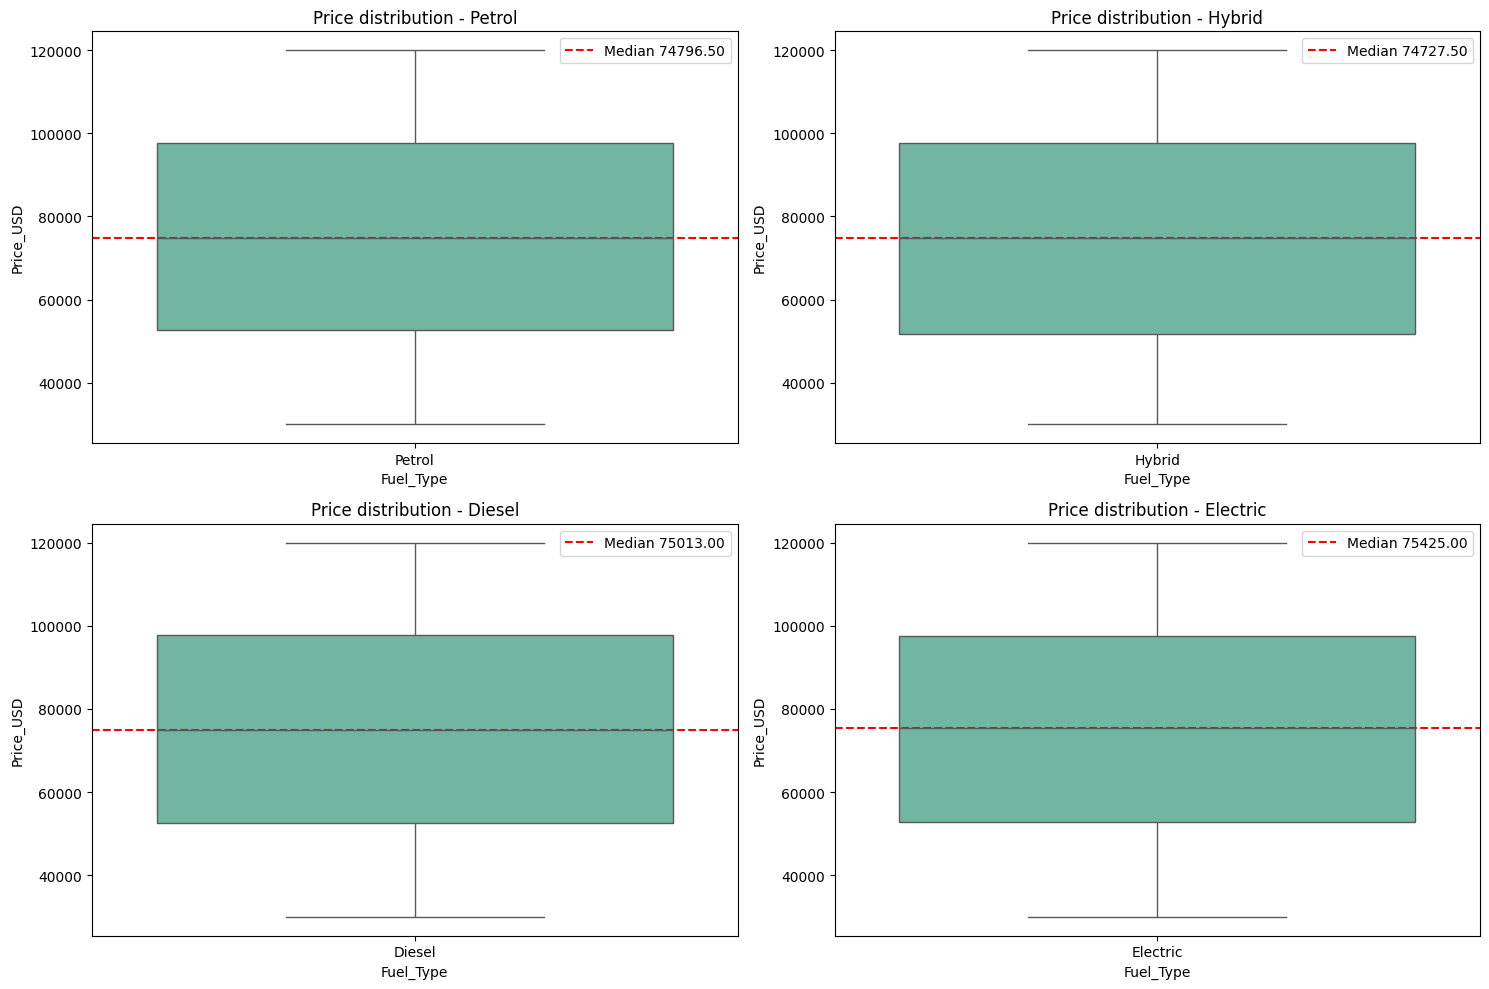

In [46]:
fuel_counts = df['Fuel_Type'].unique()

n=1
plt.figure(figsize=(15,10))
for fuel in fuel_counts:
    a = df[df['Fuel_Type'] == fuel]
    plt.subplot(2,2,n)
    sns.boxplot(data=a, x='Fuel_Type', y='Price_USD', palette='Set2')
    median = np.median(a['Price_USD'].dropna())
    plt.axhline(median, color='red', linestyle='--', label=f'Median {median:.2f}')
    plt.legend()
    plt.title(f'Price distribution - {fuel}')
    plt.tight_layout()
    n += 1
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder

<Axes: >

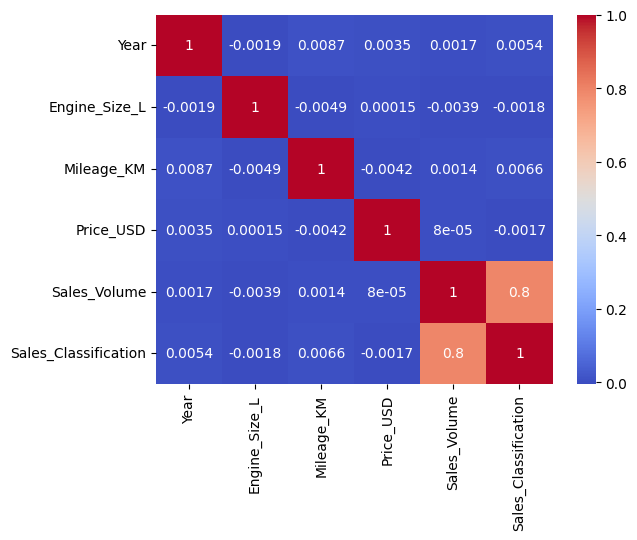

In [53]:
df['Sales_Classification'] = OneHotEncoder().fit_transform(df[['Sales_Classification']]).toarray()
a = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(a.corr(), annot=True, cmap='coolwarm')

Accuracy: 0.9998


<Axes: >

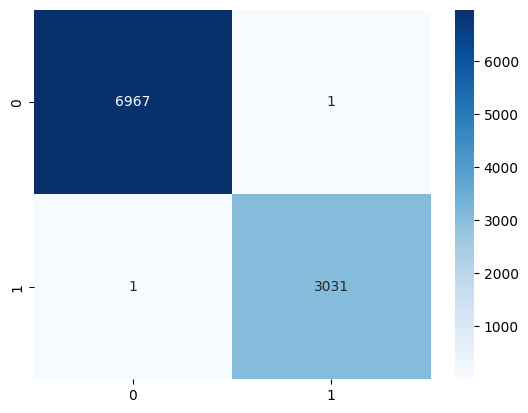

In [56]:
x = a.drop('Sales_Classification', axis=1)
y = a['Sales_Classification']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

